# Help International Clustering of Countries

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities

In this case study our work is to to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most

### Steps  for Analysis:-</br>
    1.Data Understanding and Cleaning
    2.Data Preparation
    3.Modelling

In [509]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing all libraries

In [510]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To Scale our data
from sklearn.preprocessing import scale
# To perform KMeans clustering 
from sklearn.cluster import KMeans
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler

### Data Understanding

In [511]:
#read dataset
df_help=pd.read_csv("C:/Users/jigyasu/Desktop/ML-All\Assignment_Solution/PCA_Jigyasu/Country-data.csv")
df_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [512]:
#about Dataset
df_help.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [513]:
#checking shape,columns,etc of dataset
print(df_help.shape)
print(df_help.columns)
print(df_help.info())

(167, 10)
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB
None


In [514]:
#Check null
print(df_help.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


 Hence in this dataset no null value is there so we can  directly start working on this 

In [515]:
#Converting exports,imports and health spending percentages to absolute values.
#because percentage value will not give exact picture of country
df_help['exports'] = df_help['exports']*df_help['gdpp']/100
df_help['imports'] = df_help['imports']*df_help['gdpp']/100
df_help['health'] = df_help['health']*df_help['gdpp']/100
df_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [516]:
help_df_new=df_help
help_df_new

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.2000,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840


### Data Preperation

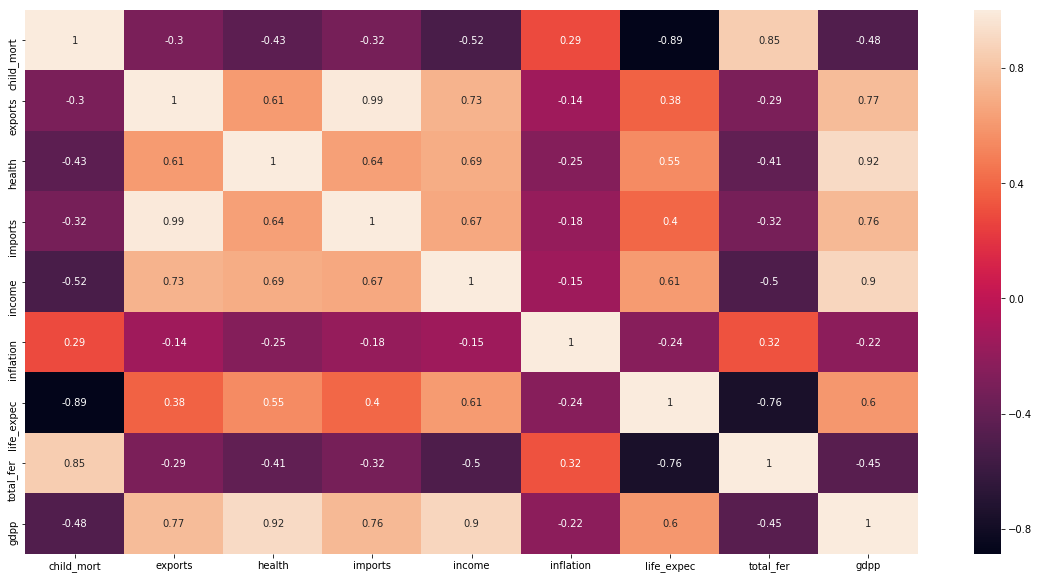

In [517]:
#So we checked data is largly cleaned.
#first let's plot the correlation matrix and check if the data is indeed highly correlated
plt.figure(figsize = (20,10))        
sns.heatmap(df_help.corr(),annot = True)

In [518]:
#The final matrix would only contain the data columns. Hence let's drop the country column
ff=df_help["country"]
df1_help=df_help.drop(['country'],axis=1)
df1_help.head() 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


##### Check Outliners

In [519]:
# Checking for outliers in the continuous variables
num_ngo = df1_help[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [520]:
#Removing Outliers
Q1 = num_ngo.quantile(0.25)
Q3 = num_ngo.quantile(0.75)
IQR = Q3 - Q1

num_ngo = num_ngo[~((num_ngo < (Q1 - 1.5 * IQR)) |(num_ngo > (Q3 + 1.5 * IQR))).any(axis=1)]
num_ngo.shape

(126, 9)

In [521]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_ngo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,39.718254,2704.262139,374.987216,2782.013572,10578.738095,7.427214,69.334921,3.055714,5758.031746
std,33.723975,3594.638754,439.675196,3410.942870,9328.705994,6.176819,7.202137,1.458543,6068.100708
min,3.200000,1.076920,12.821200,0.651092,609.000000,-4.210000,52.000000,1.230000,231.000000
25%,14.250000,395.640000,65.295750,455.272500,3115.000000,2.432500,64.150000,1.890000,1295.000000
50%,24.600000,1334.655000,214.912000,1537.880000,8215.000000,6.045000,70.900000,2.600000,3600.000000
75%,62.200000,3160.765000,503.782500,3191.730000,15400.000000,11.050000,75.000000,4.262500,8170.000000
90%,91.300000,7909.715000,950.095000,7488.900000,22050.000000,16.550000,76.800000,5.325000,13000.000000
95%,110.500000,10952.800000,1218.300000,10454.775000,28600.000000,19.575000,78.125000,5.792500,19300.000000
99%,118.250000,14881.275000,2111.145000,14267.650000,44250.000000,22.700000,80.050000,6.470000,26850.000000


In [522]:
# Checking the percentage of missing values
round(100*(df1_help.isnull().sum()/len(df1_help.index)), 2)

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

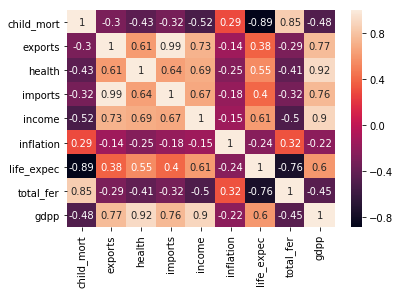

In [523]:
#checking correlation
sns.heatmap(df_help.corr(),annot = True)

### Feature Standardisation

In [524]:
# Normalising continuous features
df = df_help[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [525]:
normalized_df=(df-df.mean())/df.std()
help_df1 = df1_help.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], 1)
help_df1 = pd.concat([help_df1,normalized_df],axis=1)
help_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692


### Model Building</br>
 



#### Splitting Data in train and test dataset

In [526]:
# Splitting the data into train and test
X_train=help_df1

### PCA on Data 

In [527]:
X_train.shape

(167, 9)

In [528]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [529]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [530]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Plotting PCA

In [531]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [532]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [533]:
pcs_df = pd.DataFrame({"Features":df1_help.columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2], 'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8]})
pcs_df

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995,0.196585,0.761267,0.006444,-0.004951
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538,-0.038911,-0.013670,-0.055264,-0.717924
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200,0.180699,-0.064616,0.430072,-0.130346
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787,-0.012180,0.027182,0.131135,0.665687
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075,-0.038147,-0.023113,0.393811,0.079011
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423,0.108403,-0.022077,-0.006070,0.011281
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041,-0.586010,0.581208,0.002966,-0.031594
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336,-0.753901,-0.273145,0.034293,0.023682
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501,0.045382,-0.044023,-0.799022,0.128464


Let's plot  to get a better idea about which variables are well explained for components.

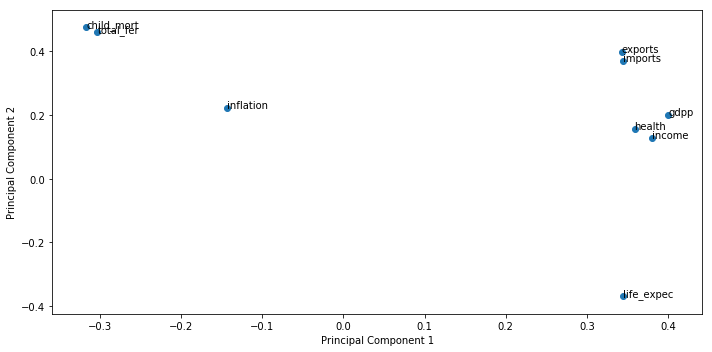

In [534]:
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Features):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [535]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

#### Sree plot

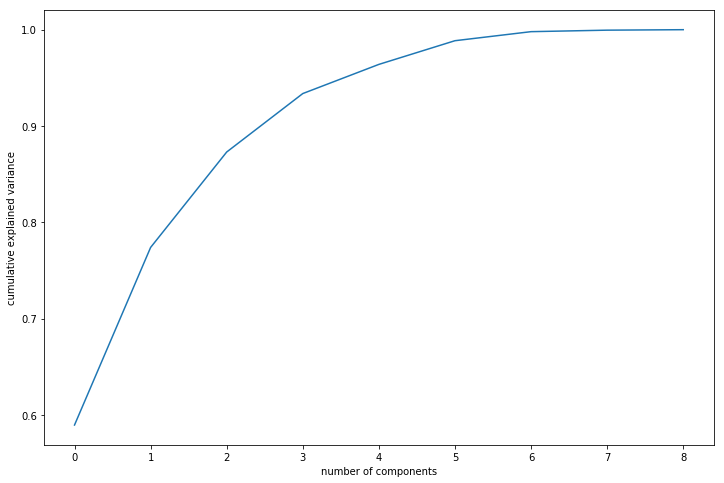

In [536]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Clearly over 95% of the data is properly explained by the first 4 principal components.

In [537]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [538]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(167, 4)

In [539]:
#take the transpose of the PC matrix so that we can create the new matrix
pc = np.transpose(df_train_pca)
pc

array([[-2.62874118e+00, -2.37738558e-02, -4.57882953e-01,
        -2.71541431e+00,  6.46831716e-01,  3.63375066e-02,
        -3.33271825e-01,  3.17481317e+00,  3.80668849e+00,
        -4.66073698e-01,  1.49508322e+00,  1.46688131e+00,
        -1.01215882e+00,  8.41984706e-01, -1.44913743e-02,
         3.94922481e+00, -4.02862973e-01, -2.35791727e+00,
        -7.13922102e-01, -1.01587430e+00,  2.50451665e-01,
        -1.12616581e+00,  1.65676144e-01,  2.69060658e+00,
         2.78791426e-01, -2.74435651e+00, -2.75530088e+00,
        -1.17642199e+00, -2.43258334e+00,  3.38757472e+00,
        -5.23080446e-01, -3.22843365e+00, -3.17720460e+00,
         6.89382146e-01, -1.29846363e-01, -1.49940817e-02,
        -1.94408784e+00, -3.10671267e+00, -2.04189119e+00,
         4.28625544e-01, -2.56549284e+00,  8.43291610e-01,
         2.30670505e+00,  1.66916308e+00,  4.36629147e+00,
        -3.67606137e-01, -3.03322942e-01, -8.35202319e-01,
        -3.37107536e-01, -1.05009766e+00, -1.94315288e+0

Creating correlation matrix for the principal components - we expect little to no correlation

In [540]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())
pd.DataFrame(corrmat)

,0,1,2,3
0,1.000000,0.000919,-0.000652,-0.004515
1,0.000919,1.000000,-0.000257,-0.015302
2,-0.000652,-0.000257,1.000000,0.008959
3,-0.004515,-0.015302,0.008959,1.000000


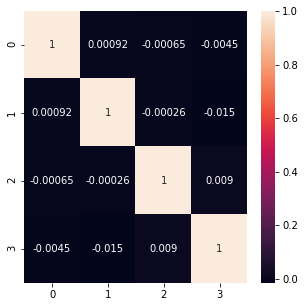

In [541]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (5,5))
sns.heatmap(corrmat,annot = True)

In [542]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.008959421276888173 , min corr:  -0.015302266510759097


In [543]:
#Let's create the newer matrix according to the given principal components
rownames = list(df_help['country'])
pcs_df2 = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})
pcs_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.628741,1.467671,-0.544861,0.236556
1,Albania,-0.023774,-1.431511,-0.009052,-0.441593
2,Algeria,-0.457883,-0.676759,0.964950,-0.175860
3,Angola,-2.715414,2.169493,0.596001,0.437603
4,Antigua and Barbuda,0.646832,-1.023420,-0.243438,-0.266711


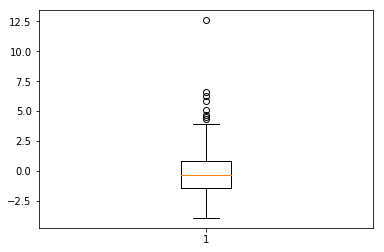

In [544]:
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

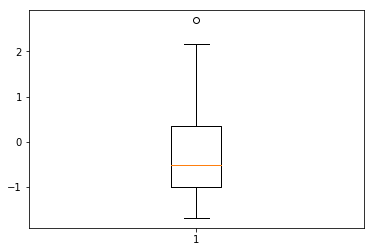

In [545]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

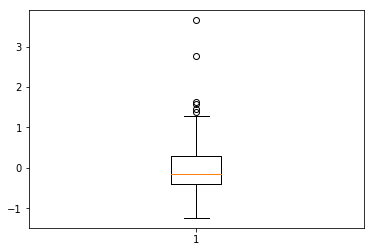

In [546]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
dat3 = pcs_df2[(pcs_df2.PC3 >= Q1 ) & (pcs_df2.PC3 <= Q3)]

In [547]:
#Outlier analysis is now done.Let's check the data again.
pcs_df2.shape

(133, 5)

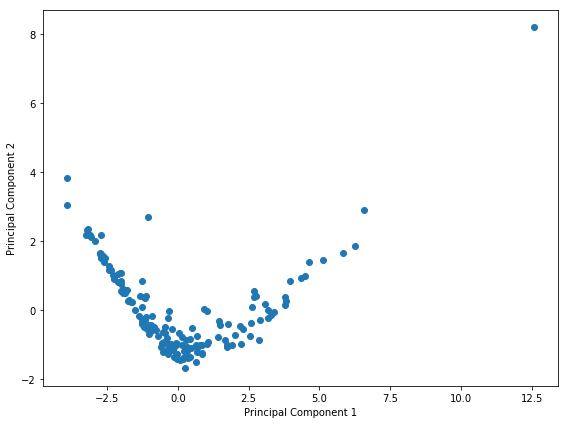

In [548]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

## Clustering

#### Hopkins Statistics

 Let's proceed to calculating the Hopkins statistic to ensure that the data is good for clustering.

In [549]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [550]:
#Let's check the Hopkins measure
df1=pd.DataFrame(df_train_pca)
hopkins(df1)

0.954190652144535

In [551]:
#0.93 is a good Hopkins score. Hence the data is suitable for clustering.
standard_scaler = StandardScaler()
df2 = pcs_df2

df2_1 = standard_scaler.fit_transform(df2.drop(['country'],axis=1))

#### Sum of Squared Distances

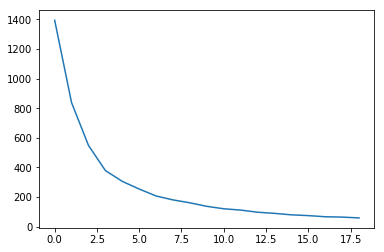

In [552]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,20)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_train_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [553]:
model_clus = KMeans(n_clusters = 5, max_iter=50)
model_clus.fit(df_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [554]:
len(model_clus.labels_)

167

In [555]:
df_pca_cluster2=pd.concat([df1,pd.Series(model_clus.labels_)], axis=1)
df_pca_cluster2.columns =['PC1','PC2','PC3','PC4','Cluster_Id']
df_pca_cluster2

,PC1,PC2,PC3,PC4,Cluster_Id
0,-2.628741,1.467671,-0.544861,0.236556,0
1,-0.023774,-1.431511,-0.009052,-0.441593,1
2,-0.457883,-0.676759,0.964950,-0.175860,1
3,-2.715414,2.169493,0.596001,0.437603,0
4,0.646832,-1.023420,-0.243438,-0.266711,1
5,0.036338,-0.682569,1.460967,0.065870,1
6,-0.333272,-1.275197,0.190200,-0.499932,1
7,3.174813,-0.237658,-0.168035,1.664689,3
8,3.806688,0.261826,-0.296445,0.971483,3
9,-0.466074,-0.492579,0.606781,-0.257742,1


In [556]:
df_pca_cluster2['Cluster_Id'].value_counts()

1    88
0    47
3    30
4     1
2     1
Name: Cluster_Id, dtype: int64

In [557]:
#adding country column
df_pca_cluster2=pd.concat([df_pca_cluster2,pd.Series(ff)],axis=1) 
help_df_new

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.2000,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840


In [558]:
#final_df=df_pca_cluster2.merge(help_df_new,how='right',left_on='country',right_on='country')
#final_df

### Silhouette Analysis

In [559]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_train_pca)
    sse_.append([k, silhouette_score(df_train_pca, kmeans.labels_)])

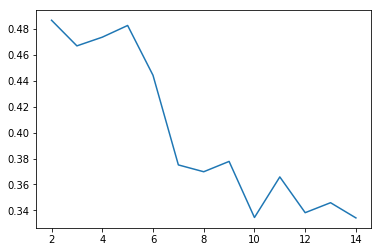

In [560]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [561]:
help_df_new=pd.concat([df1_help,pd.Series(ff)],axis=1) 
help_df_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,Afghanistan
1,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090,Albania
2,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460,Algeria
3,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,Angola
4,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,Antigua and Barbuda
5,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300,Argentina
6,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220,Armenia
7,4.8,10276.2000,4530.8700,10847.100,41400,1.160,82.0,1.93,51900,Australia
8,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,Austria
9,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840,Azerbaijan


In [562]:
final_df=df_pca_cluster2.merge(help_df_new,how='left',left_on='country',right_on='country')
final_df

,PC1,PC2,PC3,PC4,Cluster_Id,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.628741,1.467671,-0.544861,0.236556,0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
1,-0.023774,-1.431511,-0.009052,-0.441593,1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,-0.457883,-0.676759,0.964950,-0.175860,1,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,-2.715414,2.169493,0.596001,0.437603,0,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,0.646832,-1.023420,-0.243438,-0.266711,1,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,0.036338,-0.682569,1.460967,0.065870,1,Argentina,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,-0.333272,-1.275197,0.190200,-0.499932,1,Armenia,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,3.174813,-0.237658,-0.168035,1.664689,3,Australia,4.8,10276.2000,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,3.806688,0.261826,-0.296445,0.971483,3,Austria,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,-0.466074,-0.492579,0.606781,-0.257742,1,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840


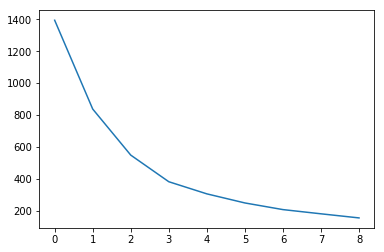

In [563]:
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_train_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [564]:
#K-means with k=5 clusters
model_clus_5 = KMeans(n_clusters = 5, max_iter=50)
model_clus_5.fit(df_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [565]:
help_df_new=pd.concat([df_help,pd.Series(ff)],axis=1) 
help_df_new

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,Afghanistan
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090,Albania
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460,Algeria
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,Angola
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,Antigua and Barbuda
5,Argentina,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300,Argentina
6,Armenia,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220,Armenia
7,Australia,4.8,10276.2000,4530.8700,10847.100,41400,1.160,82.0,1.93,51900,Australia
8,Austria,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,Austria
9,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840,Azerbaijan


### Analysis of the clusters

In [566]:
km_clusters_exports = pd.DataFrame(final_df.groupby(["Cluster_Id"]).exports.mean())
km_clusters_child_mort = pd.DataFrame(final_df.groupby(["Cluster_Id"]).child_mort.mean())
km_clusters_health = pd.DataFrame(final_df.groupby(["Cluster_Id"]).health.mean())
km_clusters_imports = pd.DataFrame(final_df.groupby(["Cluster_Id"]).imports.mean())
km_clusters_income = pd.DataFrame(final_df.groupby(["Cluster_Id"]).income.mean())
km_clusters_inflation = pd.DataFrame(final_df.groupby(["Cluster_Id"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(final_df.groupby(["Cluster_Id"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(final_df.groupby(["Cluster_Id"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(final_df.groupby(["Cluster_Id"]).gdpp.mean())
dfa= pd.concat([pd.Series([0,1,2,3,4]), km_clusters_exports, km_clusters_child_mort, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
dfa.columns = ["ClusterID", "exports_mean", "child_mort_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
dfa.head()

,ClusterID,exports_mean,child_mort_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,885.224660,90.793617,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319
1,1,3366.778392,20.918182,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364
2,2,183750.000000,2.800000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000
3,3,23900.726667,5.006667,4010.316333,20228.370000,46676.666667,2.741567,80.480000,1.791667,44103.333333
4,4,589.490000,130.000000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000


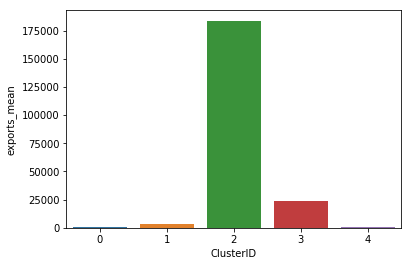

In [567]:
sns.barplot(x=dfa.ClusterID, y=dfa.exports_mean)

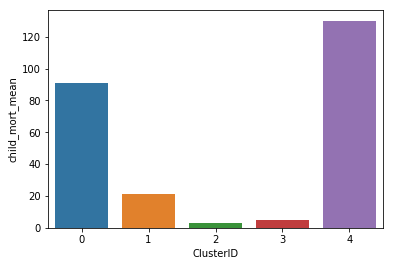

In [568]:
sns.barplot(x=dfa.ClusterID, y=dfa.child_mort_mean)

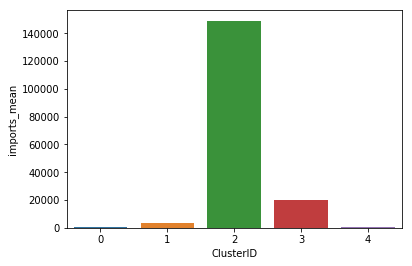

In [569]:
sns.barplot(x=dfa.ClusterID, y=dfa.imports_mean)

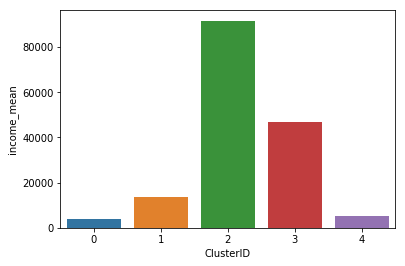

In [570]:
sns.barplot(x=dfa.ClusterID, y=dfa.income_mean)

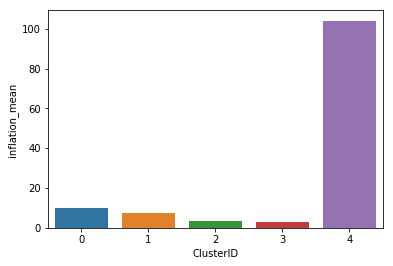

In [571]:
sns.barplot(x=dfa.ClusterID, y=dfa.inflation_mean)

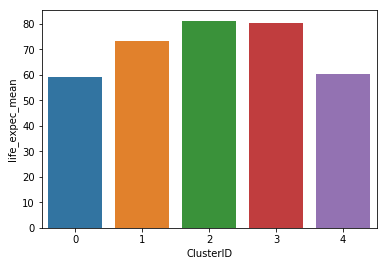

In [572]:
sns.barplot(x=dfa.ClusterID, y=dfa.life_expec_mean)

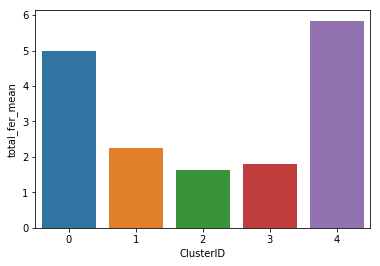

In [573]:
sns.barplot(x=dfa.ClusterID, y=dfa.total_fer_mean)

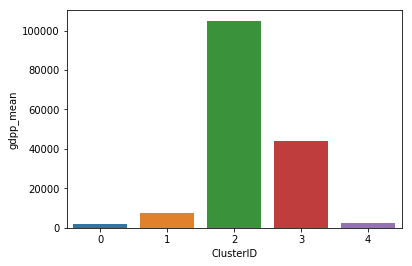

In [574]:
sns.barplot(x=dfa.ClusterID, y=dfa.gdpp_mean)

### Heirarchical Clustering

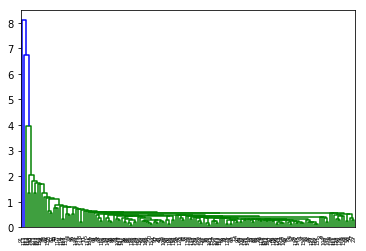

In [575]:
#Let's try hierarchical clustering to see if it works well
#First we'll try the single linkage procedure
mergings = linkage(df1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()


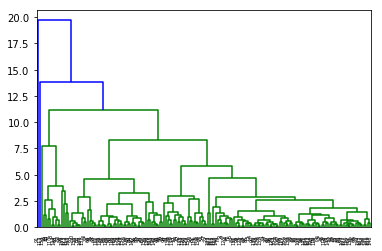

In [576]:
mergings = linkage(df1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [577]:
final_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Cluster_Id', 'country', 'child_mort',
       'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp'],
      dtype='object')

In [578]:
drop_clus = final_df.drop(["Cluster_Id"] ,axis=1, inplace = True)
drop_clus

In [579]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
RFM_hc = pd.concat([final_df, clusterCut], axis=1)
RFM_hc.columns = ['PC1', 'PC2', 'PC3','PC4','Country', 'child_mort', 'exports',
     'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',
     'gdpp','ClusterID']


In [580]:
RFM_hc

,PC1,PC2,PC3,PC4,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,-2.628741,1.467671,-0.544861,0.236556,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0
1,-0.023774,-1.431511,-0.009052,-0.441593,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090,1
2,-0.457883,-0.676759,0.964950,-0.175860,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460,1
3,-2.715414,2.169493,0.596001,0.437603,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
4,0.646832,-1.023420,-0.243438,-0.266711,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,1
5,0.036338,-0.682569,1.460967,0.065870,Argentina,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300,1
6,-0.333272,-1.275197,0.190200,-0.499932,Armenia,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220,1
7,3.174813,-0.237658,-0.168035,1.664689,Australia,4.8,10276.2000,4530.8700,10847.100,41400,1.160,82.0,1.93,51900,1
8,3.806688,0.261826,-0.296445,0.971483,Austria,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,2
9,-0.466074,-0.492579,0.606781,-0.257742,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840,1


In [581]:
km_clusters_exports = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_child_mort = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_health = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).gdpp.mean())
dfa1= pd.concat([pd.Series([0,1,2,3,4]), km_clusters_exports, km_clusters_child_mort, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
dfa1.columns = ["ClusterID", "exports2", "child_mort2", "health2","imports2","income2","inflation2","life_expec2","total_fer2","gdpp2"]
dfa1.head()

,ClusterID,exports2,child_mort2,health2,imports2,income2,inflation2,life_expec2,total_fer2,gdpp2
0,0,885.224660,90.793617,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319
1,1,5115.820178,18.555769,857.674138,4943.141549,17679.711538,6.717490,74.319231,2.172981,11638.192308
2,2,34375.214286,4.371429,5257.599286,28383.621429,53264.285714,1.828000,80.628571,1.790714,54142.857143
3,3,183750.000000,2.800000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000
4,4,589.490000,130.000000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000


<Figure size 1080x1080 with 0 Axes>

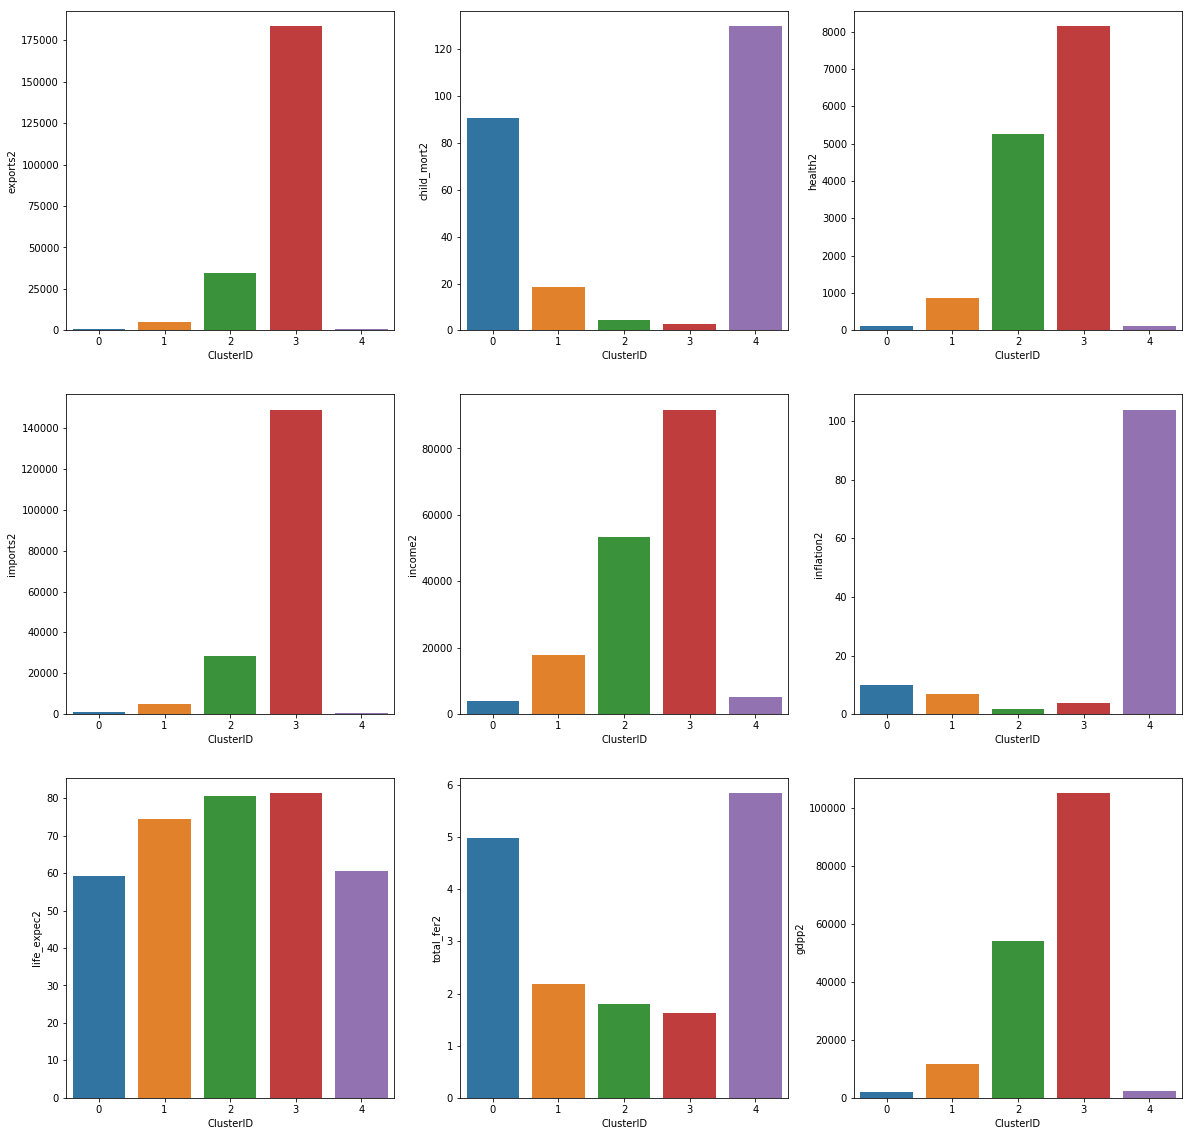

<Figure size 1080x1080 with 0 Axes>

In [582]:
plt.figure(figsize=(20,20))
plt.figure(1)
plt.subplot(331)
sns.barplot(x=dfa1.ClusterID,y=dfa1.exports2)
plt.subplot(332)
sns.barplot(x=dfa1.ClusterID,y=dfa1.child_mort2)
plt.subplot(333)
sns.barplot(x=dfa1.ClusterID,y=dfa1.health2)
plt.subplot(334)
sns.barplot(x=dfa1.ClusterID,y=dfa1.imports2)
plt.subplot(335)
sns.barplot(x=dfa1.ClusterID,y=dfa1.income2)
plt.subplot(336)
sns.barplot(x=dfa1.ClusterID,y=dfa1.inflation2)
plt.subplot(337)
sns.barplot(x=dfa1.ClusterID,y=dfa1.life_expec2)
plt.subplot(338)
sns.barplot(x=dfa1.ClusterID,y=dfa1.total_fer2)
plt.subplot(339)
sns.barplot(x=dfa1.ClusterID,y=dfa1.gdpp2)
plt.figure(figsize=(15,15))


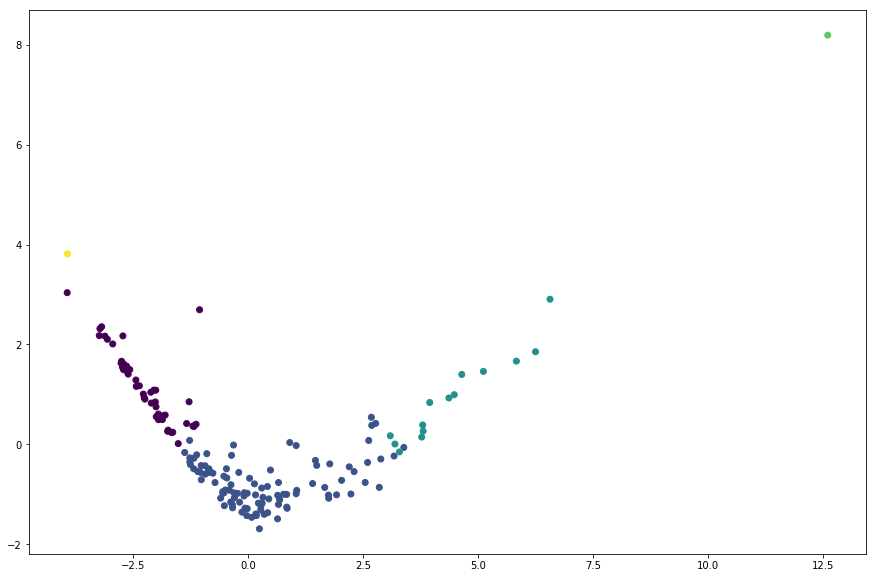

In [583]:
plt.figure(figsize=(15,10))
plt.scatter(RFM_hc.PC1,RFM_hc.PC2,c=RFM_hc.ClusterID)

Conclusion : We use the clusters formed during K-means clustering to find the countries that we require since Hierarchical clustering is not showing proper clusters here. For K-means part, we got Cluster 2 and 4 might be the ones which has a proper need of aid.